### **Lab Notes for Lesson 3: AI for Mobile Robots**
#### **Creating a ROS Package Containing Publisher and Subscriber Nodes**

---

### **Lab Objectives**
The goal of this lab is to create and test a ROS package containing a publisher node and a subscriber node. These nodes will communicate using the `rospy` library in Python. By the end of this lab, you will:
- Create a ROS package.
- Write a Python script to publish messages (publisher node).
- Write a Python script to receive and process messages (subscriber node).
- Compile and run the ROS package.

---


---
---



### **Steps and Instructions**

#### **1. Create a ROS Package**

1. **Navigate to `catkin_ws`:**
   - Open a terminal or web shell.
   - Navigate to the workspace:  
     ```bash
     $ cd catkin_ws/src/
     ```

2. **Create a New ROS Package:**
   - Run the following command:  
     ```bash
     $ catkin_create_pkg my_package rospy
     ```
   - This creates a package named `my_package` with a dependency on `rospy`.

3. **Verify the Changes:**
   - Check that a new folder named `my_package` has been created inside `catkin_ws/src`.
   - The folder structure will include:
     - `CMakeLists.txt`
     - `package.xml`
     - A new folder `src/` (for your Python code).

---


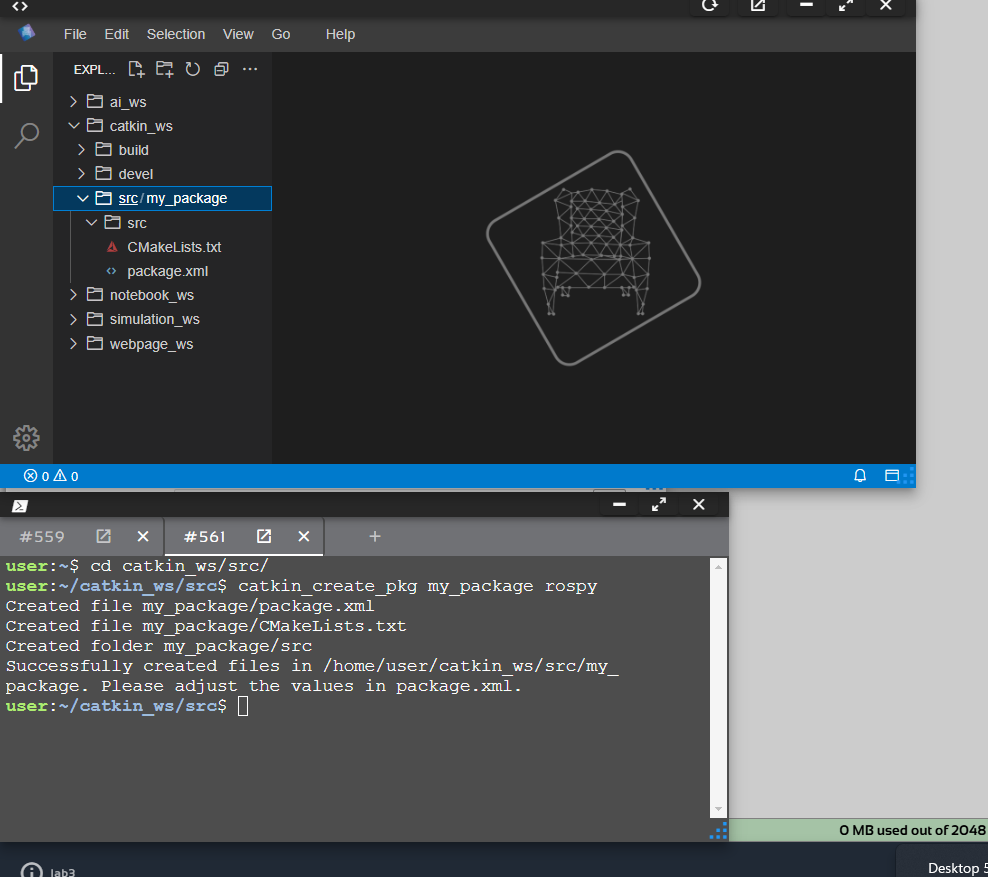

---
---



#### **2. Write a Publisher Node**

1. **Create the Publisher Script:**
   - Inside the `my_package/src` folder, create a new Python file named `talker.py`.


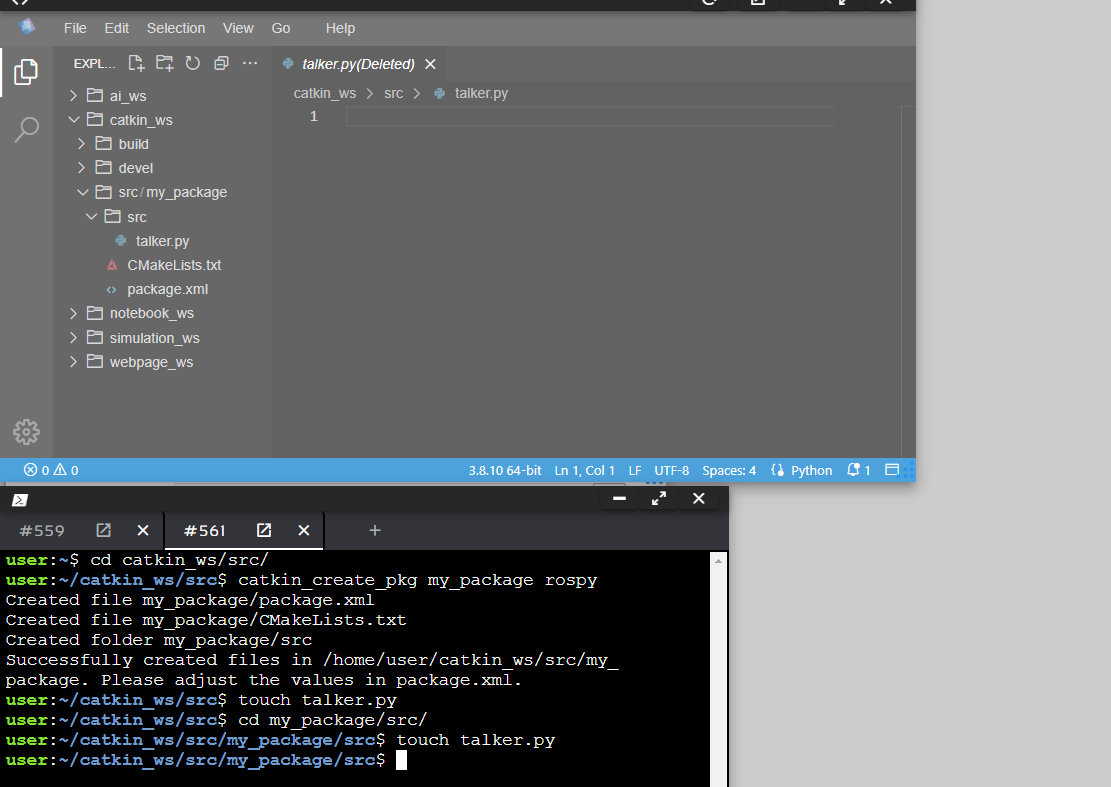



2. **Add the Following Code to `talker.py`:**
   ```python
  #!/usr/bin/env python
  # This line specifies the path to the Python interpreter to be used for this script.

  import rospy
  # Importing the rospy module, which is required to create ROS nodes.

  from std_msgs.msg import String
  # Importing the String message type from the std_msgs package for publishing and subscribing.

  def talker():
      # Define the 'talker' function, which creates and runs a ROS publisher node.

      pub = rospy.Publisher('chatter', String, queue_size=10)
      # Create a publisher object that publishes messages to the 'chatter' topic.
      # The message type is String, and the queue size determines how many messages to buffer.

      rospy.init_node('talker', anonymous=True)
      # Initialize the ROS node with the name 'talker'.
      # The 'anonymous=True' flag ensures unique node names by appending random numbers if needed.

      rate = rospy.Rate(10)  # 10hz
      # Set the rate at which the loop runs to 10 times per second (10 Hz).

      while not rospy.is_shutdown():
          # The main loop runs until ROS is shutdown (e.g., by pressing Ctrl+C).

          hello_str = "hello world %s" % rospy.get_time()
          # Generate a string that includes the current ROS time.

          rospy.loginfo(hello_str)
          # Log the message to the ROS logging system. It will appear in the console.

          pub.publish(hello_str)
          # Publish the message to the 'chatter' topic.

          rate.sleep()
          # Sleep for the remaining time to maintain the 10 Hz rate.

  if __name__ == '__main__':
      # Check if this script is run as the main program (not imported as a module).

      try:
          talker()
          # Call the 'talker' function to start the publisher node.

      except rospy.ROSInterruptException:
          # Handle exceptions raised when the program is interrupted (e.g., with Ctrl+C).
          pass


   ```

3. **Explanation of Key Lines:**
   - `rospy.Publisher('chatter', String, queue_size=10)`: Creates a topic named `chatter` for publishing messages of type `String`.
   - `rospy.init_node('talker', anonymous=True)`: Initializes the node with the name `talker`. The `anonymous=True` flag ensures unique names for nodes in case multiple instances are running.
   - `rate.sleep()`: Ensures the loop runs at a fixed frequency (10Hz in this case).

4. **Make the Script Executable:**
   - Navigate to the `src` folder containing `talker.py` and run:
     ```bash
     $ chmod +x talker.py
     ```

---


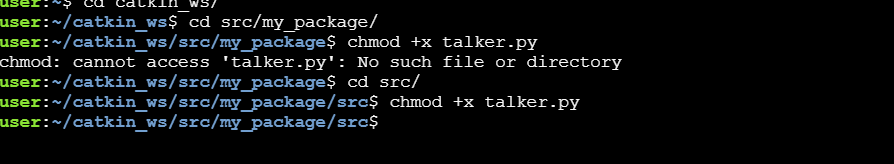

---
---



#### **3. Write a Subscriber Node**

1. **Create the Subscriber Script:**
   - Inside the `my_package/src` folder, create another Python file named `listener.py`.

2. **Add the Following Code to `listener.py`:**
   ```python
      
    #!/usr/bin/env python
    # This line specifies the Python interpreter to be used for executing the script.

    import rospy
    # Importing the rospy module, which is required to create ROS nodes.

    from std_msgs.msg import String
    # Importing the String message type from the std_msgs package, which will be used for subscribing to the topic.

    def callback(data):
        # This function is called whenever a message is received on the subscribed topic.
        # 'data' contains the message received from the topic.
        rospy.loginfo(rospy.get_caller_id() + " I heard %s", data.data)
        # Log the received message. 'rospy.get_caller_id()' provides the ID of the current node.

    def listener():
        # Define the 'listener' function to create a subscriber node.

        rospy.init_node('listener', anonymous=True)
        # Initialize the ROS node with the name 'listener'.
        # The 'anonymous=True' flag ensures each node has a unique name, even if multiple nodes with the same base name are launched.

        rospy.Subscriber("chatter", String, callback)
        # Subscribe to the topic named 'chatter'.
        # Messages of type 'String' will be received and processed using the 'callback' function.

        rospy.spin()
        # Keeps the node running and waiting for messages.
        # Without this, the node would exit immediately after being launched.

    if __name__ == '__main__':
        # This ensures the 'listener' function is only executed if this script is run directly (not imported as a module).

        listener()
        # Call the 'listener' function to initialize the subscriber node.


   ```

3. **Explanation of Key Lines:**
   - `rospy.Subscriber("chatter", String, callback)`: Subscribes to the `chatter` topic and processes messages using the `callback` function.
   - `callback(data)`: Logs the received message (`data.data`) to the console.
   - `rospy.spin()`: Keeps the subscriber node running until manually stopped.

---


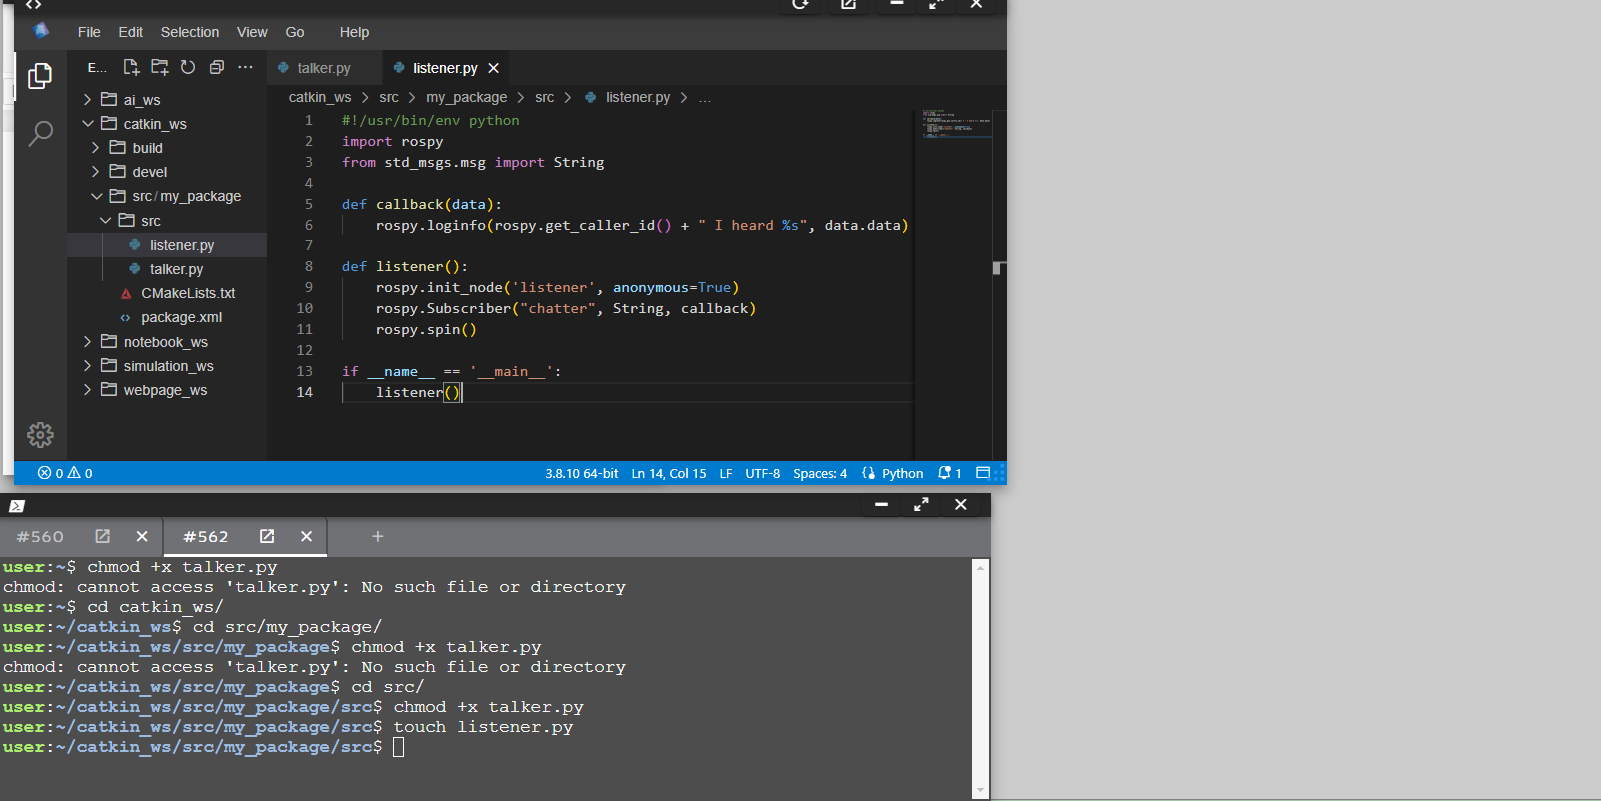

---
---



#### **4. Compile the ROS Package**

1. **Navigate to `catkin_ws`:**
   ```bash
   $ cd ~/catkin_ws
   ```

2. **Run the Build Command:**
   ```bash
   $ catkin_make
   ```
   - This compiles the package and registers the nodes in the ROS environment.

3. **Run the ROS Master:**
   - Start the ROS master node:
     ```bash
     $ roscore
     ```

---


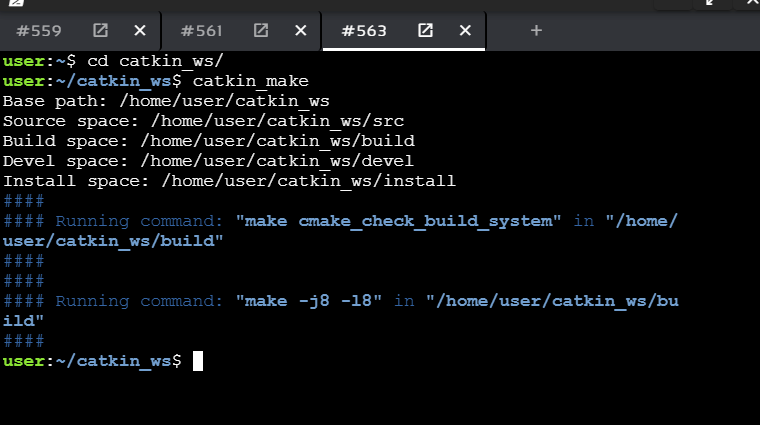

---
---



#### **5. Test the Nodes**

1. **Run the Publisher Node:**
   - Open a new terminal and navigate to the `src` folder:
     ```bash
     $ cd ~/catkin_ws/src/my_package/src
     ```
   - Run the `talker.py` script:
     ```bash
     $ python talker.py
     ```

2. **Run the Subscriber Node:**
   - Open another terminal and navigate to the `src` folder:
     ```bash
     $ cd ~/catkin_ws/src/my_package/src
     ```
   - Run the `listener.py` script:
     ```bash
     $ python listener.py
     ```

3. **Observe the Output:**
   - The publisher will send "hello world" messages with timestamps to the `chatter` topic.
   - The subscriber will receive these messages and log them to the console.

---


- First do subscriber
- Second do publisher
  - this will work

---
---



#### **6. Advanced Task: Creating Nodes for `Int32` Messages**

1. **Modify `talker2.py` (Publisher):**
   - Create a new file named `talker2.py` in `src`:
     ```python
     #!/usr/bin/env python
     import rospy
     from std_msgs.msg import Int32

     def talker2():
         pub = rospy.Publisher('chatter2', Int32, queue_size=10)
         rospy.init_node('talker2', anonymous=True)
         rate = rospy.Rate(10)
         counter = 0
         while not rospy.is_shutdown():
             rospy.loginfo("Counter: %d", counter)
             pub.publish(counter)
             counter += 1
             rate.sleep()

     if __name__ == '__main__':
         try:
             talker2()
         except rospy.ROSInterruptException:
             pass
     ```

2. **Modify `listener2.py` (Subscriber):**
   - Create a new file named `listener2.py` in `src`:
     ```python
     #!/usr/bin/env python
     import rospy
     from std_msgs.msg import Int32

     def callback(data):
         rospy.loginfo("I heard: %d", data.data)

     def listener2():
         rospy.init_node('listener2', anonymous=True)
         rospy.Subscriber("chatter2", Int32, callback)
         rospy.spin()

     if __name__ == '__main__':
         listener2()
     ```

3. **Test the New Nodes:**
   - Run `talker2.py` and `listener2.py` as described earlier.
   - Observe the counter being published and received.

---


---
---



### **Reference Materials**
1. [ROS Publisher and Subscriber Tutorial](http://wiki.ros.org/ROS/Tutorials/WritingPublisherSubscriber%28python%29)
2. [Creating ROS Packages](http://wiki.ros.org/ROS/Tutorials/CreatingPackage)
3. *ROS Robotics By Example* by Carol Fairchild and Thomas L. Harman. (Available via DMU library).

This lab ensures hands-on familiarity with creating and testing ROS nodes for message-based communication.

---
---
